# Long Audio VAD

Let say you want to cut your realtime recording audio by using VAD, malaya-speech able to do that.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/long-audio-asr-torchaudio](https://github.com/huseinzol05/malaya-speech/tree/master/example/long-audio-asr-torchaudio).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import malaya_speech
from malaya_speech import Pipeline
from malaya_speech.utils.astype import float_to_int

`pyaudio` is not available, `malaya_speech.streaming.pyaudio` is not able to use.


### Load VAD model

We are going to use WebRTC VAD model, read more about VAD at https://malaya-speech.readthedocs.io/en/latest/load-vad.html

In [2]:
vad_model = malaya_speech.vad.webrtc()

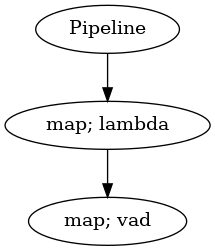

In [3]:
p_vad = Pipeline()
pipeline = (
    p_vad.map(lambda x: float_to_int(x, divide_max_abs=False))
    .map(vad_model)
)
p_vad.visualize()

Starting malaya-speech 1.4.0, streaming always returned a float32 array between -1 and +1 values.

### Streaming interface

```python
def stream(
    src,
    vad_model=None,
    asr_model=None,
    classification_model=None,
    format=None,
    option=None,
    buffer_size: int = 4096,
    sample_rate: int = 16000,
    segment_length: int = 2560,
    num_padding_frames: int = 20,
    ratio: float = 0.75,
    min_length: float = 0.1,
    max_length: float = 10.0,
    realtime_print: bool = True,
    **kwargs,
):
    """
    Stream an audio using torchaudio library.

    Parameters
    ----------
    vad_model: object, optional (default=None)
        vad model / pipeline.
    asr_model: object, optional (default=None)
        ASR model / pipeline, will transcribe each subsamples realtime.
    classification_model: object, optional (default=None)
        classification pipeline, will classify each subsamples realtime.
    format: str, optional (default=None)
        Supported `format` for `torchaudio.io.StreamReader`,
        https://pytorch.org/audio/stable/generated/torchaudio.io.StreamReader.html#torchaudio.io.StreamReader
    option: dict, optional (default=None)
        Supported `option` for `torchaudio.io.StreamReader`,
        https://pytorch.org/audio/stable/generated/torchaudio.io.StreamReader.html#torchaudio.io.StreamReader
    buffer_size: int, optional (default=4096)
        Supported `buffer_size` for `torchaudio.io.StreamReader`, buffer size in byte. Used only when src is file-like object,
        https://pytorch.org/audio/stable/generated/torchaudio.io.StreamReader.html#torchaudio.io.StreamReader
    sample_rate: int, optional (default = 16000)
        output sample rate.
    segment_length: int, optional (default=2560)
        usually derived from asr_model.segment_length * asr_model.hop_length,
        size of audio chunks, actual size in term of second is `segment_length` / `sample_rate`.
    num_padding_frames: int, optional (default=20)
        size of acceptable padding frames for queue.
    ratio: float, optional (default = 0.75)
        if 75% of the queue is positive, assumed it is a voice activity.
    min_length: float, optional (default=0.1)
        minimum length (second) to accept a subsample.
    max_length: float, optional (default=10.0)
        maximum length (second) to accept a subsample.
    realtime_print: bool, optional (default=True)
        Will print results for ASR.
    **kwargs: vector argument
        vector argument pass to malaya_speech.streaming.pyaudio.Audio interface.

    Returns
    -------
    result : List[dict]
    """
```

### Start streaming

In [4]:
samples = malaya_speech.streaming.torchaudio.stream('speech/podcast/2x5%20Ep%2010.wav',
                                                    vad_model = p_vad, 
                                                    segment_length = 320)

/home/husein/.local/lib/python3.8/site-packages/torchaudio/io/_stream_reader.py:696: UserWarning: The number of buffered frames exceeded the buffer size. Dropping the old frames. To avoid this, you can set a higher buffer_chunk_size value. (Triggered internally at /root/project/torchaudio/csrc/ffmpeg/stream_reader/buffer.cpp:157.)
  return self._be.process_packet(timeout, backoff)


In [5]:
len(samples)

23

In [6]:
import IPython.display as ipd
import numpy as np

In [7]:
samples[4]

{'wav_data': array([ 0.0458374 ,  0.04632568,  0.0489502 , ..., -0.03302002,
        -0.03625488, -0.02584839], dtype=float32),
 'timestamp': datetime.datetime(2023, 2, 17, 0, 40, 4, 402398)}

In [8]:
ipd.Audio(samples[4]['wav_data'], rate = 16000)